# Loan Income

In [12]:
import pandas as pd

df_income = pd.read_csv('../input/loans_income.csv')
df_income.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


In [2]:
import numpy as np

X1 = df_income.sample(1000).values.ravel()
X2, X3 = [], []
for iS in range(1000):
    xSample = df_income.sample(5).values.ravel()
    X2.append(np.mean(xSample))
for iS in range(1000):
    xSample = df_income.sample(20).values.ravel()
    X3.append(np.mean(xSample))

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,   15., 9351.,  634.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.]),
 array([     0,   5000,  10000,  15000,  20000,  25000,  30000,  35000,
         40000,  45000,  50000,  55000,  60000,  65000,  70000,  75000,
         80000,  85000,  90000,  95000, 100000, 105000, 110000, 115000,
        120000, 125000, 130000, 135000, 140000, 145000, 150000, 155000,
        160000, 165000, 170000, 175000, 180000, 185000, 190000, 195000]),
 <a list of 39 Patch objects>)

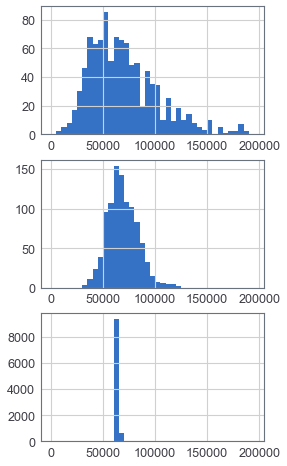

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style(theme='grade3')

plt.figure(figsize=(4,8))
plt.subplot(3,1,1)
plt.hist(X1, bins=range(0,200000,5000))
plt.subplot(3,1,2)
plt.hist(X2, bins=range(0,200000,5000))
plt.subplot(3,1,3)
plt.hist(X3, bins=range(0,200000,5000))

In [93]:
X3 = []
sample_size = 50
for iS in range(10000):
    xSample = df_income.sample(sample_size, replace=True).values.ravel()
    X3.append(np.median(xSample))

(array([  22.,  212.,  807., 1856., 2673., 2433., 1377.,  474.,  129.,
          17.]),
 array([65254.039 , 65985.8334, 66717.6278, 67449.4222, 68181.2166,
        68913.011 , 69644.8054, 70376.5998, 71108.3942, 71840.1886,
        72571.983 ]),
 <a list of 10 Patch objects>)

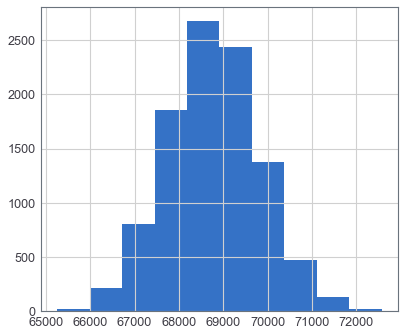

In [55]:
plt.hist(X3, bins=10)

In [37]:
X_median = np.median(df_income['x'])
X3_median = np.median(X3)
X3_std = np.std(X3)
print(X_median, "v.s.", X3_median, "+-", X3_std / np.sqrt(len(df_income) / sample_size))

62000.0 v.s. 62000.0 +- 219.61139745467116


In [59]:
cl = 95
q1 = np.percentile(X3, (100-cl)/2.)
q2 = np.percentile(X3, (100+cl)/2.)
print(np.mean(X3), "(", q1, ",", q2, ")")

68768.0603937 ( 66746.3745 , 70839.0053 )


((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([65254.039, 65294.299, 65430.69 , ..., 72285.618, 72373.566,
         72571.983])),
 (1043.1291178019508, 68768.0603937, 0.9998027650625042))

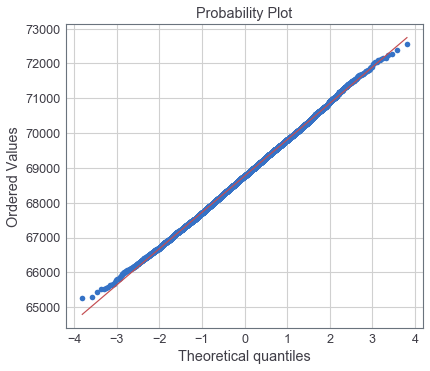

In [62]:
from scipy import stats

stats.probplot(X3, plot=plt)

((array([-4.12791011, -3.85006317, -3.70036769, ...,  3.70036769,
          3.85006317,  4.12791011]),
  array([-3.25539878, -3.23199763, -3.23199763, ...,  3.78834771,
          3.83515002,  4.05156386])),
 (0.976599529662295, -5.382479097368589e-16, 0.9963077206670146))

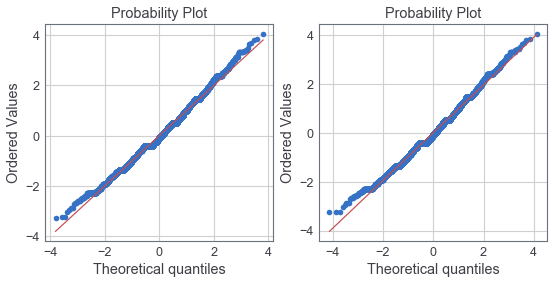

In [94]:
X3 = (X3 - np.mean(X3)) / np.std(X3)
plt.figure(figsize=(9,4))
plt.subplot(121)
stats.probplot(X3, plot=plt, dist='norm')
plt.subplot(122)
t = stats.t(df=50)
stats.probplot(X3, plot=plt, dist=t)

# SP500

In [63]:
df_sp500 = pd.read_csv('../input/sp500_data.csv')

df_sp500.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


(-4, 4)

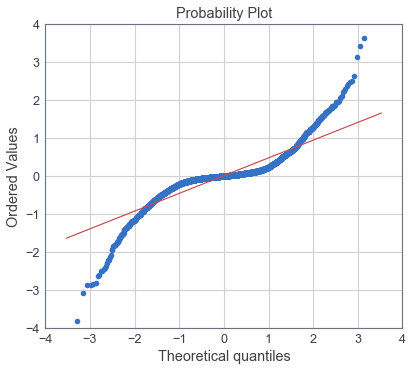

In [69]:
stats.probplot(df_sp500['NFLX'][df_sp500['NFLX']!=0], plot=plt)
plt.xlim([-4,4])
plt.ylim([-4,4])

(-4, 4)

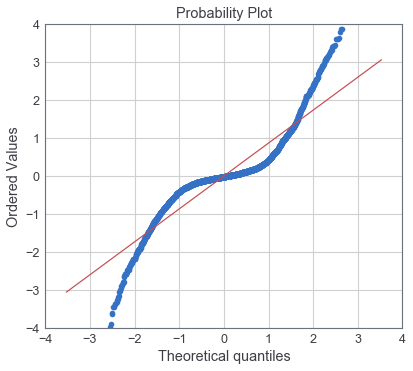

In [73]:
X = df_sp500['NFLX'][df_sp500['NFLX']!=0]
X = (X-np.mean(X)) / np.std(X)
stats.probplot(X, plot=plt)
plt.xlim([-4,4])
plt.ylim([-4,4])